## Twitter Analysis Group HW Assignment ##
###### by Paige DeFiori and Alessandro Hammond
This notebook analyzes tweets pertaining to the global reaction to the COVID-19 Vaccine. To understand the interpretation of the vaccine, the tweets found using the keyword(s) "covid vaccine" will be from two diffferent cities: New York City and Miami. These cities were selected as the states they are in have gone about COVID restrictions and lockdowns very differently; NY being morestrict than Florida. The tweets found in these locations will then be analyzed via sentiment analysis and compared in word clouds and sentiment charts for comparison.

### Importing all the important sources:

In [1]:
# importing the usual:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

# for tweets:
import tweepy as tw

# library to display html images
from IPython.display import Image, HTML
from PIL import Image

# for sentiment analysis:
from textblob import TextBlob
import re

# to make word clouds:
from wordcloud import WordCloud, STOPWORDS

### Acessing twitter with authentication:

In [2]:
# Paige's twitter keys/secrets/tokens:
consumer_key= 'dLNeRZhhS5OXcbI4LzodgRHXD'
consumer_secret= 'iliiNSmQuYsSjGCFvhAr8Pr7itA64Y6GrmDAJqfToTVhoBq4tF'
access_token= '1558740666-av3CnKYnRbLsienKcYkLx44zIZYEJ5FlyeMQun3'
access_token_secret= 'oAJSL4gBKZfaqHeASGTKo6MsYmfKwiKAfhKO7ygWW5BTR'

In [3]:
# Authenticating Paige with twitter:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Adding key search term for "vaccine":

In [4]:
# Entering our search query for the vaccine:
searchterm = 'covid vaccine'

# Filtering out retweets:
q = searchterm + " -filter:retweets"

# Limiting the tweets range:
max_tweets = 500

# Creation of query method using parameters:
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

### Creating a cursor for Miami specifically via its geocode:

Using Miami's geocode: 25.7490733382648,-80.3134555147886, retrieved from Google:

In [5]:
miami_tweets = tw.Cursor(api.search,
                   q=q,
                         # Miami geocode
                   geocode='25.7490733382648,-80.3134555147886,50km', 
                   tweet_mode='extended').items(max_tweets)

# printing the most recent tweets to see accuracy in code:
for index, tweet in enumerate(miami_tweets):
    print(index, tweet.full_text)

0 Me:
I'll disguise myself to avoid the c0vid-19 vaccine

Them:
2 Florida women busted while dressed up as “grannies” to get c0vid-19 vaccine
https://t.co/pSkv30RbXv
1 Not sure where to get your COVID-19 Vaccine? Plan your vaccine here:  
—
#TreeceTalk #TreeceFinancial #COVIDupdates #Pandemic #AnthonyFauci #Vaccine #FinancialWellness #MarketUpdates #Coronavirus #NewVaccine #COVID19 #over65 #generalpublic #healthcare https://t.co/X2JgJUd0f9 https://t.co/mb9127VAls
2 Want to work at CVS Health? We're hiring in Miami, FL! Click for details: https://t.co/x02w9vyM5U #Healthcare #CVSJob
3 Pfizer sucks!! Always have. Horrible international track record. Why TF dont we just Jonas Salk the Covid Vaccine you greedy, unethical, manipulative, problematic pigs??? https://t.co/FJgiZ1oRl2
4 Jackson’s new COVID vaccine policy is likely to favor the more affluent. Here’s why
https://t.co/uJ9iIaDoXd
5 Publix will resume COVID-19 vaccine sign-ups Wednesday, but not in South Florida ⁦@GovRonDeSantis⁩ ⁦@ma

The output proves that it works as its supposed to!

Next, we convert these 500 Miami tweets from json into a dataframe in preparation for visualizations:

In [6]:
# Search twitter (again) and assign it to its own variable
miami_tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='25.7490733382648,-80.3134555147886,50km', 
                   tweet_mode='extended').items(max_tweets)

In [7]:
json_data = [tweet._json for tweet in miami_tweets]

df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Tue Feb 23 23:59:16 +0000 2021  1364364233186684930  1364364233186684930   
1  Tue Feb 23 23:45:01 +0000 2021  1364360645962006528  1364360645962006528   
2  Tue Feb 23 23:43:49 +0000 2021  1364360343082790912  1364360343082790912   
3  Tue Feb 23 23:41:54 +0000 2021  1364359862407344129  1364359862407344129   
4  Tue Feb 23 23:37:55 +0000 2021  1364358862137098242  1364358862137098242   

                                           full_text  truncated  \
0  Me:\nI'll disguise myself to avoid the c0vid-1...      False   
1  Not sure where to get your COVID-19 Vaccine? P...      False   
2  Want to work at CVS Health? We're hiring in Mi...      False   
3  Pfizer sucks!! Always have. Horrible internati...      False   
4  Jackson’s new COVID vaccine policy is likely t...      False   

  display_text_range                                             source  \
0           [0, 163]  <a href="http://twitter.com/download/android" ...   
1           [0, 275]  <a href="https://secure.fmgsuite.com" rel="nof...   
2           [0, 117]  <a href="https://www.careerarc.com" rel="nofol...   
3           [0, 170]  <a href="http://twitter.com/download/iphone" r...   
4           [0, 107]  <a href="http://twitter.com/download/iphone" r...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2                    NaN                      None                  NaN  ...   
3                    NaN                      None                  NaN  ...   
4                    NaN                      None                  NaN  ...   

  quoted_status.place.id quoted_status.place.url  \
0                    NaN                     NaN   
1                    NaN                     NaN   
2                    NaN                     NaN   
3                    NaN                     NaN   
4                    NaN                     NaN   

   quoted_status.place.place_type  quoted_status.place.name  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   quoted_status.place.full_name quoted_status.place.country_code  \
0                            NaN                              NaN   
1                            NaN                              NaN   
2                            NaN                              NaN   
3                            NaN                              NaN   
4                            NaN                              NaN   

   quoted_status.place.country  quoted_status.place.contained_within  \
0                          NaN                                   NaN   
1                          NaN                                   NaN   
2                          NaN                                   NaN   
3                          NaN                                   NaN   
4                          NaN                                   NaN   

   quoted_status.place.bounding_box.type  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   quoted_status.place.bounding_box.coordinates  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  

[5 rows x 176 columns]

Viewing the data to select the columns for trimming:

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 176 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             500 non-null    object 
 1   id                                                     500 non-null    int64  
 2   id_str                                                 500 non-null    object 
 3   full_text                                              500 non-null    object 
 4   truncated                                              500 non-null    bool   
 5   display_text_range                                     500 non-null    object 
 6   source                                                 500 non-null    object 
 7   in_reply_to_status_id                                  76 non-null     float64
 8   in_reply_to_status_id_str                        

Trimming the dataframe, renaming the columns and converting url images into html images to view:

In [9]:
# Trimming the columns
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]

# Renaming the columns
df.columns = ['created_at','text','username','profile_picture']

# Overriding the default so that we can see the entire text in the column
pd.set_option('display.max_colwidth', None)

# Using the function to convert url to html image:
def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

HTML(df.to_html(escape=False ,formatters=dict(profile_picture=path_to_image_html)))

#### Cleaning the data:

In [10]:
# Function to clean tweets using regular expressions, given in lecture:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

Testing to see if the cleaning function works:

In [11]:
miami_tweet = df.sample().text.values[0]
print(miami_tweet)
clean_tweet(miami_tweet)

Where to get a COVID-19 #vaccine in #Miami. Details here: https://t.co/CNuiIYmihP https://t.co/lxA5pILZU2


'Where to get a COVID19 vaccine in Miami Details here'

Now seeing that it works properly, I will add a cleaned version of the tweet as a column to the dataframe as well as creating a variable for every single word from the selected tweets:

In [12]:
# create a new column for the clean text
df['miami_clean_text'] = ''

# loop and add the cleaned up text to the new column
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'miami_clean_text'] = clean

# now put every word from every tweet into a single variable
all_text = ' '.join(df['miami_clean_text'])
all_text

'MeIll disguise myself to avoid the c0vid19 vaccineThem2 Florida women busted while dressed up as grannies to get c0vid19 vaccine Not sure where to get your COVID19 Vaccine Plan your vaccine here TreeceTalk TreeceFinancial COVIDupdates Pandemic AnthonyFauci Vaccine FinancialWellness MarketUpdates Coronavirus NewVaccine COVID19 over65 generalpublic healthcare Want to work at CVS Health Were hiring in Miami FL Click for details Healthcare CVSJob Pfizer sucks Always have Horrible international track record Why TF dont we just Jonas Salk the Covid Vaccine you greedy unethical manipulative problematic pigs Jacksons new COVID vaccine policy is likely to favor the more affluent Heres why Publix will resume COVID19 vaccine signups Wednesday but not in South Florida no vaccine for Blue South Florida Did not contribute enough to DeSantis campaign I guess Starting Wednesday seniors 65 and older can schedule a COVID19 vaccine appointment at all CVS y ms and Navarro Discount Pharmacies in MiamiDade

### Creating a dataframe for NYC, just as done above for Miami

In [13]:
# Search twitter (again) in NYC specific geocode
nyc_tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='34.068921,-118.4473751,50km', 
                   tweet_mode='extended').items(max_tweets)

In [14]:
# change from json tweets to dataframe
json_data2 = [tweet._json for tweet in nyc_tweets]

In [15]:
df2 = pd.json_normalize(json_data2)
df2.head()

created_at                   id               id_str  \
0  Wed Feb 24 00:15:57 +0000 2021  1364368431307350018  1364368431307350018   
1  Wed Feb 24 00:11:28 +0000 2021  1364367305216458756  1364367305216458756   
2  Wed Feb 24 00:07:23 +0000 2021  1364366277628715009  1364366277628715009   
3  Wed Feb 24 00:06:26 +0000 2021  1364366038213697539  1364366038213697539   
4  Wed Feb 24 00:03:45 +0000 2021  1364365360766488578  1364365360766488578   

                                                                                                                                                                                                                                                                                      full_text  \
0                                                                                                                                                                      Florida's seniors-first vaccine effort may expand to include some police officers and teachers \nhttps://t.co/e7jj9aEevR   
1                                                                                                                                                                                                                                 Just got my 2nd COVID vaccine dose!!! https://t.co/jg9K54XRi5   
2                                                             “The scientists say they make the most of each animal, but monkeys infected with Covid-19 cannot be returned to live among other healthy animals and must be eventually euthanized.”\n\nI hate humans lol https://t.co/RSuiy6mvxY   
3                                                   New #COVID19 strains – what does it mean for #vaccines? The @US_FDA  is going to allow vaccine companies to quickly deal with new mutations if they avoid the immune response https://t.co/5c6KTy50xo #VaccinesWork https://t.co/mDpoCnMaRd   
4  "Gallup COVID tracking survey recently found 66% of Americans dissatisfied with the vaccine rollout in the U.S.\n\nHowever, the public is also much more positive about the current COVID situation.\n\nClearly, Americans are not yet holding Biden responsible for perceived shortcomings"   

   truncated display_text_range  \
0      False           [0, 119]   
1      False            [0, 37]   
2      False           [0, 223]   
3      False           [0, 211]   
4      False           [0, 280]   

                                                                                 source  \
0  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2                    NaN                      None                  NaN  ...   
3                    NaN                      None                  NaN  ...   
4           1.364365e+18       1364365173595676674           25912403.0  ...   

  quoted_status.place.full_name quoted_status.place.country_code  \
0                           NaN                              NaN   
1                           NaN                              NaN   
2                           NaN                              NaN   
3                           NaN                              NaN   
4                           NaN                              NaN   

   quoted_status.place.country  quoted_status.place.contained_within  \
0                          NaN                                   NaN   
1        

#### Cleaning NYC data

In [16]:
# Trimming the columns
df2 = df2[['created_at','full_text','user.screen_name','user.profile_image_url_https']]

# Renaming the columns
df2.columns = ['created_at','text','username','profile_picture']

# Overriding the default so that we can see the entire text in the column
pd.set_option('display.max_colwidth', None)

# Using the function to convert url to html image:
def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

HTML(df2.to_html(escape=False ,formatters=dict(profile_picture=path_to_image_html)))

Using the `clean_tweet` function ready defined above:

In [17]:
# create a new column for the clean text
df2['nyc_clean_text'] = ''

# loop and add the cleaned up text to the new column
for i, row in df2.iterrows():
    clean = clean_tweet(row.text)
    df2.at[i,'nyc_clean_text'] = clean

Creating a seperate `all_text` variable for NYC specifically

In [18]:
all_text2 = ' '.join(df2['nyc_clean_text'])
all_text2

'Floridas seniorsfirst vaccine effort may expand to include some police officers and teachers Just got my 2nd COVID vaccine dose The scientists say they make the most of each animal but monkeys infected with Covid19 cannot be returned to live among other healthy animals and must be eventually euthanizedI hate humans lol New COVID19 strains what does it mean for vaccines The FDA is going to allow vaccine companies to quickly deal with new mutations if they avoid the immune response VaccinesWork Gallup COVID tracking survey recently found 66 of Americans dissatisfied with the vaccine rollout in the USHowever the public is also much more positive about the current COVID situationClearly Americans are not yet holding Biden responsible for perceived shortcomings My parents just got back from getting their second COVID vaccine This time the entire process only took 45 minutes A state program intended to address inequity in the vaccine rollout has reportedly been exploited The findings show t

### Creating WordClouds

Adding the search term "vaccine" to the list of stop words prior to making the actual images:

In [19]:
stop_words = [searchterm] + list(STOPWORDS)

#### Creating a WordCloud for Miami

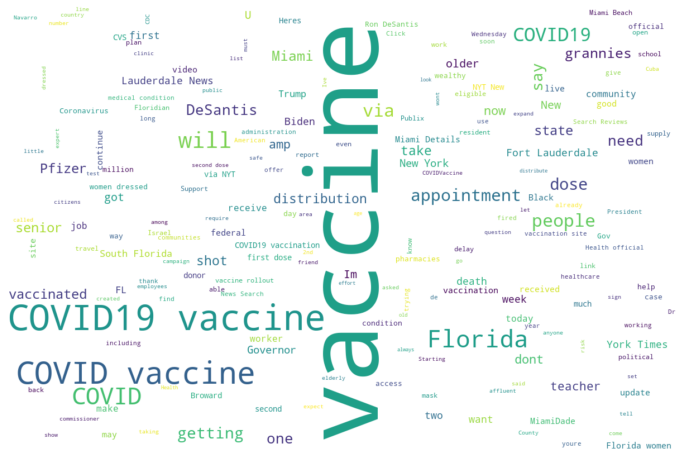

In [20]:
# create the WordCloud
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Creating a WordCloud for NYC

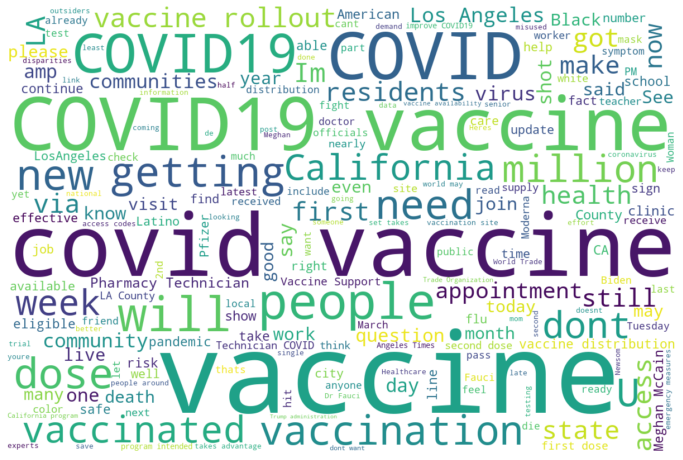

In [21]:
# create the WordCloud
wordcloud2 = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text2)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

### Creating masks to make the WordClouds better

Creating a mask for miami using a png uploaded to Week 7

In [22]:
miami_mask = Image.open("miami.png")
miami_mask = np.array(miami_mask)
miami_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

Seeing the array data from the mask, from [here]("https://www.datacamp.com/community/tutorials/wordcloud-python") I learned that you need to replace the values in an array with 255 in order to mask properly. So I created a function to do so:

In [23]:
def transform_format(val):
    if(val.any() == 0):
        return(255)
    else:
        return(val)

Now that the function are replaced, a new mask needs to be declared and made using the function:

In [24]:
transformed_miami = np.ndarray((miami_mask.shape[0],miami_mask.shape[1]), np.int32)

for i in range(len(miami_mask)):
               transformed_miami[i] = list(map(transform_format, miami_mask[i]))

Making sure the Miami mask, as an arrray, was in fact transformed:

In [25]:
transformed_miami

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

Now to create a new wordcloud with this masked image:

(-0.5, 1199.5, 1199.5, -0.5)

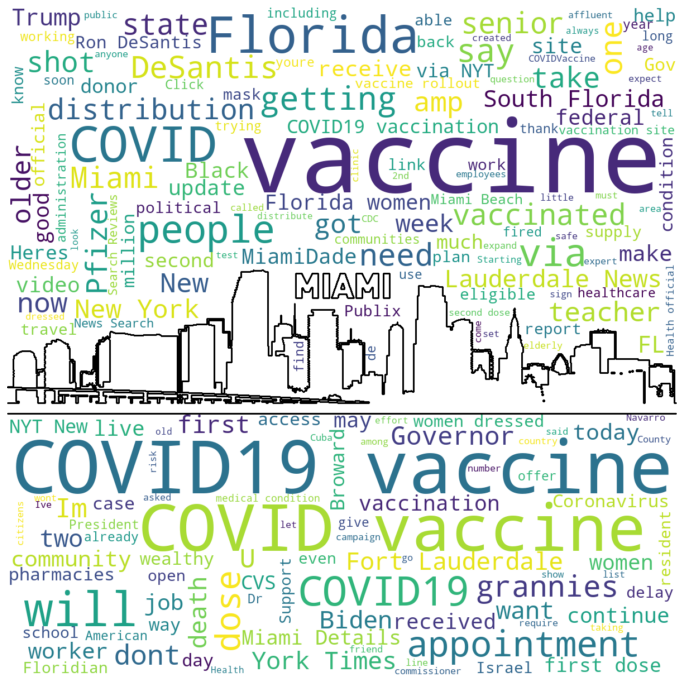

In [26]:
wc = WordCloud(width=1000,height=1200,background_color="white",
               mask=transformed_miami,stopwords=stop_words, contour_width=2, contour_color='black').generate(all_text)

wc.generate(all_text)
# Saving the WordCloud to a new file
wc.to_file("miami_wordcloud.png")

# Display the WordCloud  
plt.figure(figsize=(12,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Doing the same for a NYC skyline

In [27]:
nyc_mask = Image.open("nyc.png")
nyc_mask = np.array(nyc_mask)
nyc_mask

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [16, 16, 16, ..., 16, 16, 12],
       [16, 16, 16, ..., 16, 16, 12],
       [16, 16, 16, ..., 16, 16, 12]], dtype=uint8)

Creating a new format function, as the previously deffined one had inverse effects on the NYC png array:

In [29]:
def transform_format2(val):
    if(val.any() == 0 | val.any() == 1):
        return(255)
    else:
        return(val)

Using the `transform_format2` function defined above:

In [30]:
transformed_nyc = np.ndarray((nyc_mask.shape[0],nyc_mask.shape[1]), np.int32)

for i in range(len(nyc_mask)):
               transformed_nyc[i] = list(map(transform_format2, nyc_mask[i]))

Making sure the NYC mask, as an arrray, was in fact transformed:

In [31]:
transformed_nyc

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

(-0.5, 2478.5, 902.5, -0.5)

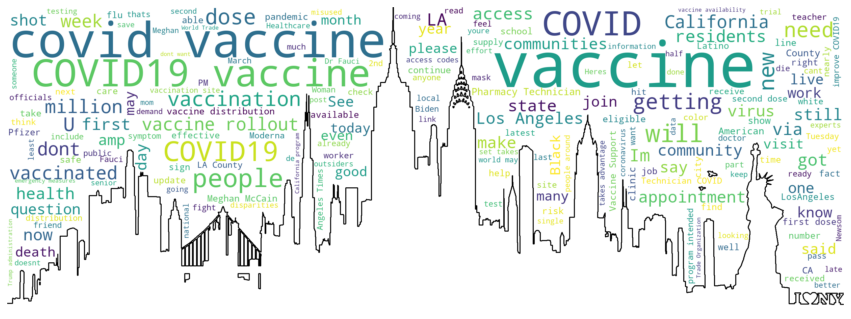

In [32]:
wc2 = WordCloud(width=1200,height=800,background_color="white",
               mask=transformed_nyc,stopwords=stop_words, contour_width=2, contour_color='black').generate(all_text2)

wc2.generate(all_text2)
# Saving the WordCloud to a new file
wc2.to_file("nyc_wordcloud.png")

# Display the WordCloud  
plt.figure(figsize=(15,12))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")

## Sentiment Analysis

Printing a sample sentiment from each dataframe:

In [33]:
# getting a random tweet from Miami
tweet = df.sample().miami_clean_text.values[0]
print('Miami tweet:\n',tweet)

# getting a random tweet from NYC
tweet2 = df2.sample().nyc_clean_text.values[0]
print('NYC tweet:\n', tweet2)

# analyze the tweets
a = TextBlob(tweet)
b = TextBlob(tweet2)

# results
print('Miami sentiment:\n', a.sentiment)
print('NYC sentiment:\n', b.sentiment)

Miami tweet:
 Youre rightbut we should actually notify DOJ to ask for an investigation into vaccine clinic in Manatee County Which wealthy donor got preference
NYC tweet:
 and ai Release an AI Scheduling Automation Solution to Improve COVID19 Vaccine Rollout artificialintelligence AiThority AIAssistant Automation Healthcare
Miami sentiment:
 Sentiment(polarity=0.25, subjectivity=0.55)
NYC sentiment:
 Sentiment(polarity=0.0, subjectivity=0.0)


In [34]:
# loop through every row and add the polarity value in our new column
for i, row in df.iterrows():
    a = TextBlob(row.miami_clean_text)
    df.at[i,'miami_polarity'] = a.polarity

# loop through every row and add the polarity value in our new column
for i, row in df2.iterrows():
    a = TextBlob(row.nyc_clean_text)
    df2.at[i,'nyc_polarity'] = a.polarity

In [35]:
# create a list of our conditions
conditions = [
    (df['miami_polarity'] < -0.2), # very negative
    (df['miami_polarity'] < 0) & (df['miami_polarity'] >= -0.2),   # negative
    (df['miami_polarity'] == 0),  # neutral
    (df['miami_polarity'] > 0) & (df['miami_polarity'] <= 0.2),    # positive
    (df['miami_polarity'] > 0.2)  # very positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['miami_sentiment'] = np.select(conditions, values)

In [36]:
# display updated DataFrame
df.sample(5)[['miami_clean_text','miami_polarity','miami_sentiment']]

miami_clean_text  \
285                              WebMD Drivethru COVID19 vaccination sites if set up nationwide on a massive scale could significantly speed up the number of Americans vaccinated delivering 350 million doses in 100 days according to new research   
72   Malls even those on the brink of extinction have enormous space and ample parking to repurpose for services like COVID vaccine sites Check out 5 ways malls are reinventing themselves in 2021GSDcontracting generalcontractor COVIDconstruction   
278                                                                                                                                                                                 How Much Does A Vial Of COVID19 Vaccine Go For Goats and Soda NPR   
476                                                      Join next weeks discussion on race and the COVID19 vaccine in the Black community with special guest Congresswoman Frederica Wilson When Thursday Feb 25 130 pmJoin here BeMDC Miami vaccine   
392                                                                                                                  you should add dentists to be eligible for a Covid vaccineto the front of the line workers They work in open mouths all day long   

     miami_polarity miami_sentiment  
285        0.170455        positive  
72         0.000000         neutral  
278        0.200000        positive  
476        0.063492        positive  
392       -0.025000        negative

In [37]:
# create a list of our conditions
conditions2 = [
    (df2['nyc_polarity'] < -0.2), # very negative
    (df2['nyc_polarity'] < 0) & (df2['nyc_polarity'] >= -0.2),   # negative
    (df2['nyc_polarity'] == 0),  # neutral
    (df2['nyc_polarity'] > 0) & (df2['nyc_polarity'] <= 0.2),    # positive
    (df2['nyc_polarity'] > 0.2)  # very positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
df2['nyc_sentiment'] = np.select(conditions, values)

In [38]:
# display updated DataFrame
df2.sample(5)[['nyc_clean_text','nyc_polarity','nyc_sentiment']]

nyc_clean_text  \
234                                                                                                                                                                                                                                  Just scheduled my covid vaccine appt   
161                                                        HOLD YOUR JAW IF YOU READ THIS REPORTIT MAY DROP TO THE FLOOR FROM DISBELIEFHARVARD STUDYREPARATIONS FOR DESCENDANTS OF SLAVERY COULD BE BETTER THAN A COVID VACCINETHESE IVY ELITES ARE EXACT UP TO 68 BETTER   
248                                                                                                                                                    Do you know someone who has cheated the system and illegally received a covid vaccine before they were supposed to   
253                                         Millions of people around the world may not get access to a COVID19 vaccine until as late as 2024 unless reverses the Trump administrations blockage of emergency measures at the World Trade Organization WTO PeoplesVaccine   
472  disabled chronicillness NEISvoid DisabilityTwitter how do we feel about being forgotten and ignored yet again by the covid vaccine rollout we are just as likely to die as the 1A 75 tier but since our numbers are smaller most of us dont even qualify for tier 1C   

     nyc_polarity  nyc_sentiment  
234      0.000000  very negative  
161      0.416667       negative  
248     -0.500000       positive  
253     -0.300000       positive  
472      0.075000  very negative

### Sentiment and Polarity Charts

In [39]:
# get a 5 colors from sequential color bar
sentiment_colors = ox.plot.get_colors(5,cmap='RdPu_r',return_hex=True)

In [40]:
# bar chart
fig = px.bar(df, 
             x='miami_sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '" in Miami',
             color='miami_sentiment',
             category_orders = {'miami_sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

In [41]:
# bar chart
fig2 = px.bar(df2, 
             x='nyc_sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '" in NYC',
             color='nyc_sentiment',
             category_orders = {'nyc_sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig2.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig2.show()

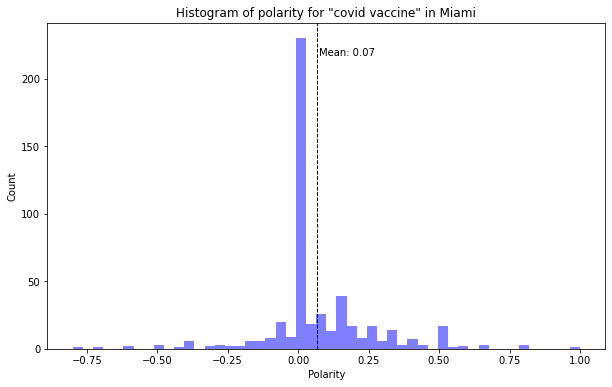

In [42]:
# histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.miami_polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity for "' + searchterm + '" in Miami')

plt.axvline(df.miami_polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.miami_polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.miami_polarity.mean()))

plt.show();

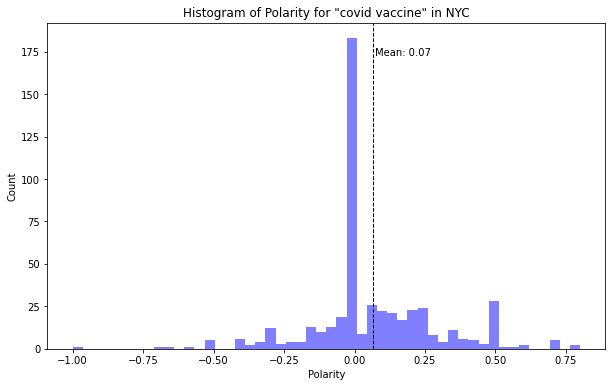

In [43]:
# histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df2.nyc_polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity for "' + searchterm + '" in NYC')

plt.axvline(df2.nyc_polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df2.nyc_polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df2.nyc_polarity.mean()))

plt.show();

Interestingly enough, the polarity and sentiment between these two opposite cities is extremely similar. Similarly neutral, which comes as a slight surprise! There was definitely an expectation that Miami's tweets would've been more negatively polarized and in sentiment because the state has been so laxed and lenient on COVID lockdowns adn regulations in comparison to NYC. The countries political leanings also acted as an assumed factorr of this, however the data reveals otherwise.

## Contributions
Paige: I did the Miami twitter analysis as well as putting our two notebooks together and adding a mask for the WordClouds <br>
Alessandro: I did the NYC twitter analysis including its WordClouds, sentiment bar chart and histogram